# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 636


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
     # Add 1 to the record count
    record_count += 1
    
     # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | vilyuchinsk
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | walvis bay
Processing Record 8 of Set 1 | sinabang
Processing Record 9 of Set 1 | jining
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | ghat
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | bonthe
Processing Record 18 of Set 1 | kalabo
Processing Record 19 of Set 1 | pierre
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | atbara
Processing Record 23 of Se

Processing Record 43 of Set 4 | ngerengere
Processing Record 44 of Set 4 | mitsamiouli
Processing Record 45 of Set 4 | dover
Processing Record 46 of Set 4 | homer
Processing Record 47 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 48 of Set 4 | olinda
Processing Record 49 of Set 4 | waddan
Processing Record 0 of Set 5 | vallenar
Processing Record 1 of Set 5 | nova sintra
Processing Record 2 of Set 5 | ola
Processing Record 3 of Set 5 | soe
Processing Record 4 of Set 5 | osuna
Processing Record 5 of Set 5 | armacao de buzios
Processing Record 6 of Set 5 | mitchell
Processing Record 7 of Set 5 | susuman
Processing Record 8 of Set 5 | sumbawa besar
Processing Record 9 of Set 5 | progreso
Processing Record 10 of Set 5 | richard-toll
Processing Record 11 of Set 5 | kruisfontein
Processing Record 12 of Set 5 | antsohimbondrona
City not found. Skipping...
Processing Record 13 of Set 5 | fonte boa
Processing Record 14 of Set 5 | nishinoomote
Processing Record 15 of Set 5 | ea

Processing Record 35 of Set 8 | sur
Processing Record 36 of Set 8 | la libertad
Processing Record 37 of Set 8 | cairns city
City not found. Skipping...
Processing Record 38 of Set 8 | nizhnyaya tavda
Processing Record 39 of Set 8 | lipno
Processing Record 40 of Set 8 | fort-shevchenko
Processing Record 41 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 42 of Set 8 | oranjemund
Processing Record 43 of Set 8 | wangkui
Processing Record 44 of Set 8 | el calafate
Processing Record 45 of Set 8 | kadugli
Processing Record 46 of Set 8 | tucuma
Processing Record 47 of Set 8 | mpulungu
Processing Record 48 of Set 8 | coahuayana de hidalgo
Processing Record 49 of Set 8 | san jose village
City not found. Skipping...
Processing Record 0 of Set 9 | uba
Processing Record 1 of Set 9 | port lavaca
Processing Record 2 of Set 9 | cadale
Processing Record 3 of Set 9 | christchurch
Processing Record 4 of Set 9 | ulanhot
Processing Record 5 of Set 9 | kurayoshi
Processing Record 6

Processing Record 24 of Set 12 | quarai
Processing Record 25 of Set 12 | 'alaqahdari dishu
Processing Record 26 of Set 12 | deyang
Processing Record 27 of Set 12 | guerrero negro
Processing Record 28 of Set 12 | sao tome
Processing Record 29 of Set 12 | karasuyama
Processing Record 30 of Set 12 | aberystwyth
Processing Record 31 of Set 12 | saint-leu
Processing Record 32 of Set 12 | selfoss
Processing Record 33 of Set 12 | paracatu
Processing Record 34 of Set 12 | ahau
City not found. Skipping...
Processing Record 35 of Set 12 | rabo de peixe
Processing Record 36 of Set 12 | takamaka
City not found. Skipping...
Processing Record 37 of Set 12 | dunedin
Processing Record 38 of Set 12 | skopin
Processing Record 39 of Set 12 | shakawe
Processing Record 40 of Set 12 | villa yapacani
Processing Record 41 of Set 12 | nenjiang
Processing Record 42 of Set 12 | kuqa
Processing Record 43 of Set 12 | baoshan
Processing Record 44 of Set 12 | salaga
Processing Record 45 of Set 12 | primero de enero


In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          610
Lat           610
Lng           610
Max Temp      610
Humidity      610
Cloudiness    610
Wind Speed    610
Country       610
Date          610
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,287.22,85,42,1.58,AU,1700496663
1,bredasdorp,-34.5322,20.0403,296.01,59,100,7.77,ZA,1700496664
2,vilyuchinsk,52.9306,158.4028,274.30,77,100,6.49,RU,1700496664
3,grytviken,-54.2811,-36.5092,275.23,99,100,2.96,GS,1700496664
4,edinburgh of the seven seas,-37.0676,-12.3116,286.52,85,100,9.77,SH,1700496664


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,287.22,85,42,1.58,AU,1700496663
1,bredasdorp,-34.5322,20.0403,296.01,59,100,7.77,ZA,1700496664
2,vilyuchinsk,52.9306,158.4028,274.30,77,100,6.49,RU,1700496664
3,grytviken,-54.2811,-36.5092,275.23,99,100,2.96,GS,1700496664
4,edinburgh of the seven seas,-37.0676,-12.3116,286.52,85,100,9.77,SH,1700496664


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

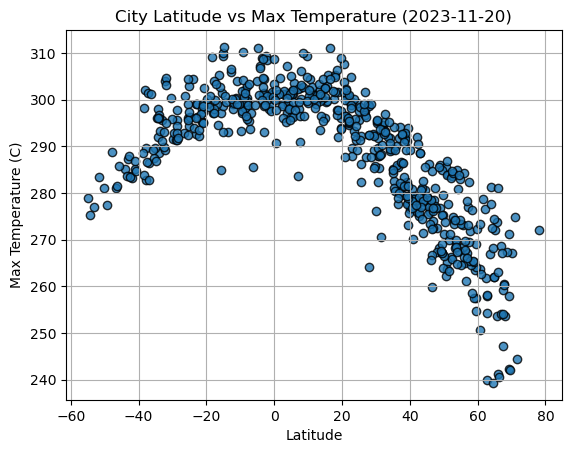

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolor = 'black', alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title ("City Latitude vs Max Temperature (2023-11-20)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

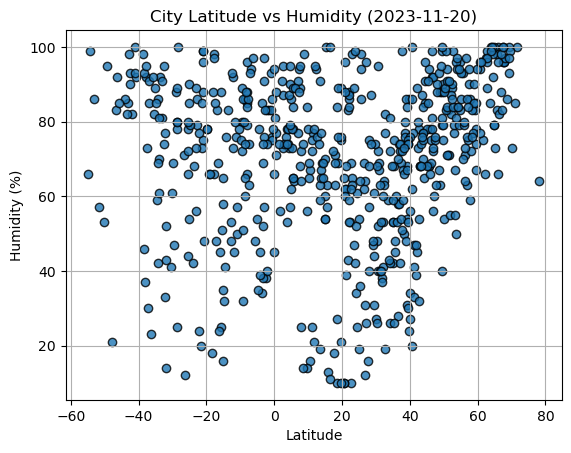

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolor = 'black', alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title ("City Latitude vs Humidity (2023-11-20)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

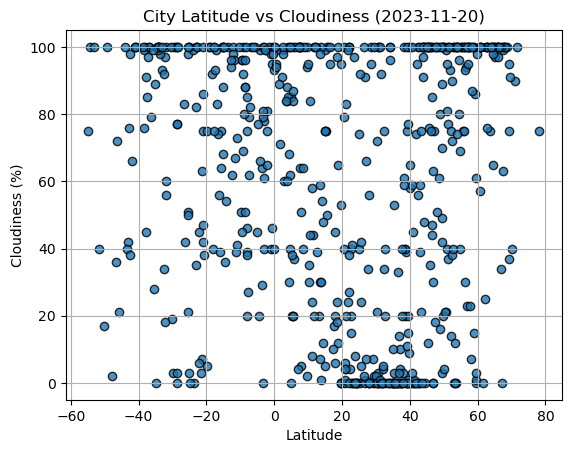

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolor = 'black', alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title ("City Latitude vs Cloudiness (2023-11-20)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

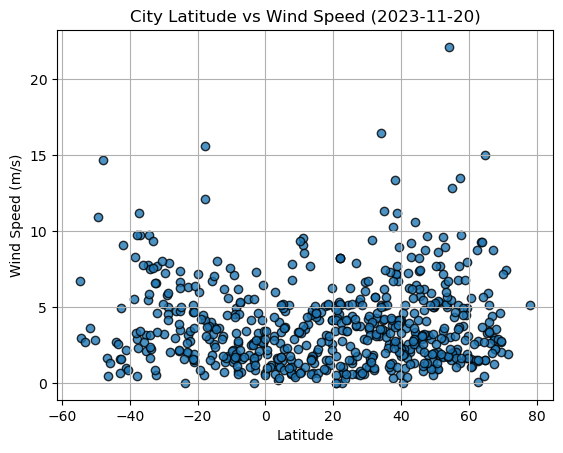

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolor = 'black', alpha = 0.8)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title ("City Latitude vs Wind Speed (2023-11-20)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [98]:
# Define a function to create Linear Regression plots

def lr_plots(df):
    
    # This function calculates linear regression and plots scatter plots that include the regression fit and equation line
    # argument df should be a pandas DataFrame with 2 columns (x and y)
    
    #calculate linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[df.columns[0]],df[df.columns[1]])
    
    #print r value
    print(f"The r-value is: {round(rvalue,2)}")

    #calculate regression fit and create line equation
    regress_values = df[df.columns[0]] * slope + intercept
    line_eq = f'y= {round(slope,1)}x + {round(intercept,1)}'

    # ploting
    # create dict to be used for y label plots
    label_dict = {"Max Temp": "Max Temperature (C)",
                  "Humidity": "Humidity (%)",
                  "Cloudiness": "Cloudiness (%)",
                  "Wind Speed": "Wind Speed (m/s)"}
    
    # scatter plot
    plt.scatter(df[df.columns[0]],df[df.columns[1]])
    plt.plot(df[df.columns[0]],regress_values,"r-")
    plt.annotate(line_eq, (5,10),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(label_dict[df.columns[1]])
    plt.show()    


In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,vilyuchinsk,52.9306,158.4028,274.30,77,100,6.49,RU,1700496664
7,sinabang,2.4803,96.3801,299.08,87,99,3.11,ID,1700496665
8,jining,35.4050,116.5814,282.51,68,0,3.44,CN,1700496666
11,ghat,24.9647,10.1728,295.67,19,74,2.41,LY,1700496666
12,tiksi,71.6872,128.8694,244.46,100,100,1.91,RU,1700496667


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,287.22,85,42,1.58,AU,1700496663
1,bredasdorp,-34.5322,20.0403,296.01,59,100,7.77,ZA,1700496664
3,grytviken,-54.2811,-36.5092,275.23,99,100,2.96,GS,1700496664
4,edinburgh of the seven seas,-37.0676,-12.3116,286.52,85,100,9.77,SH,1700496664
5,punta arenas,-53.1500,-70.9167,277.10,86,100,2.71,CL,1700496665


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.87


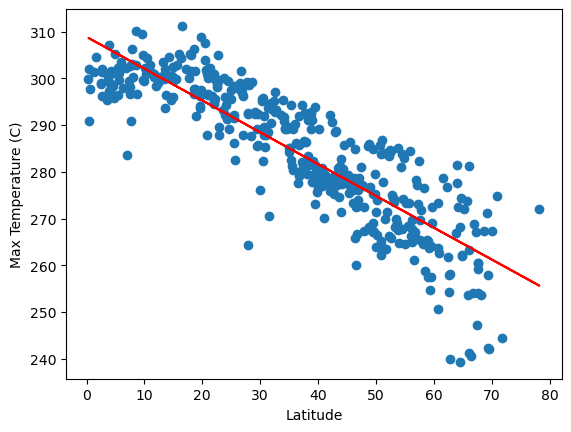

In [99]:
# Linear regression on Northern Hemisphere
df = northern_hemi_df[["Lat", "Max Temp"]]
lr_plots(df)

The r-value is: 0.73


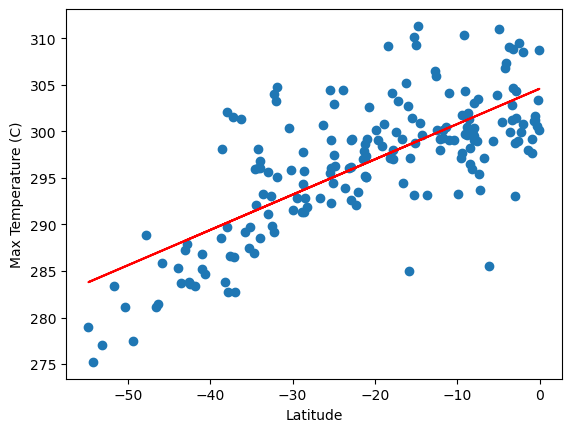

In [100]:
# Linear regression on Southern Hemisphere
df = southern_hemi_df[["Lat", "Max Temp"]]
lr_plots(df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.32


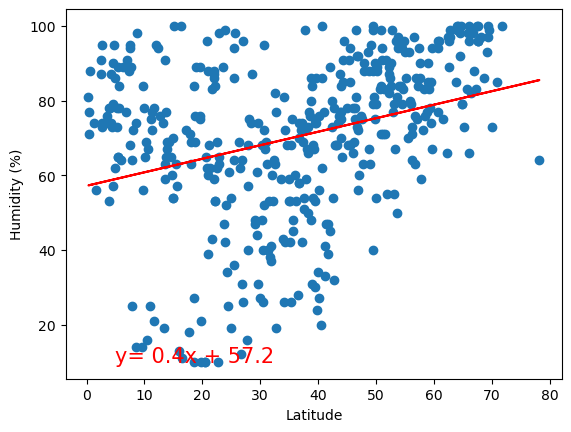

In [101]:
# Northern Hemisphere
df = northern_hemi_df[["Lat", "Humidity"]]
lr_plots(df)

The r-value is: -0.1


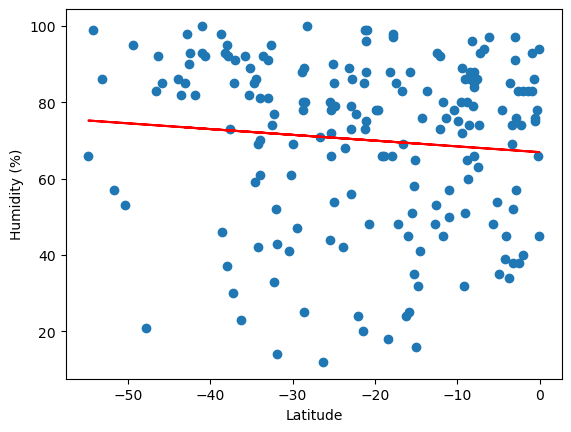

In [102]:
# Southern Hemisphere
df = southern_hemi_df[["Lat", "Humidity"]]
lr_plots(df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17


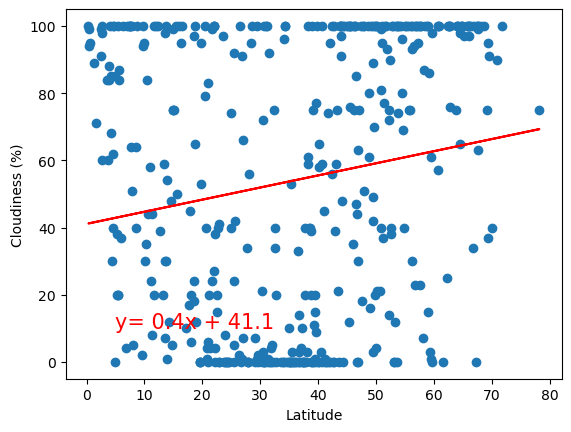

In [103]:
# Northern Hemisphere
df = northern_hemi_df[["Lat", "Cloudiness"]]
lr_plots(df)

The r-value is: 0.03


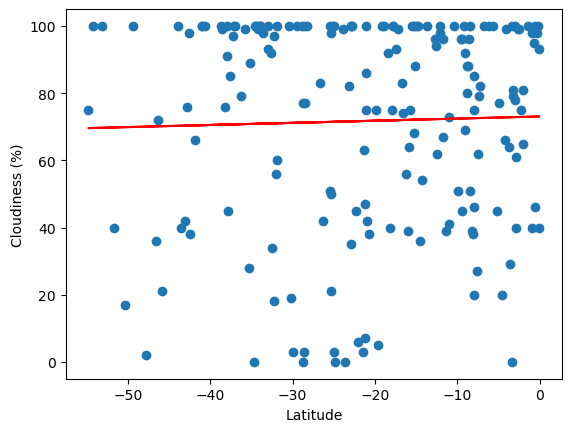

In [104]:
# Southern Hemisphere
df = southern_hemi_df[["Lat", "Cloudiness"]]
lr_plots(df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17


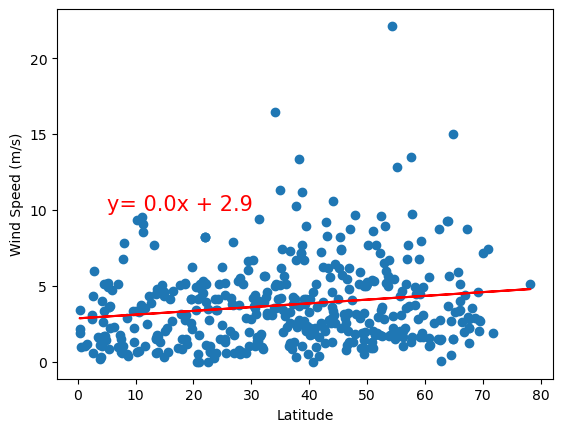

In [105]:
# Northern Hemisphere
df = northern_hemi_df[["Lat", "Wind Speed"]]
lr_plots(df)

The r-value is: -0.24


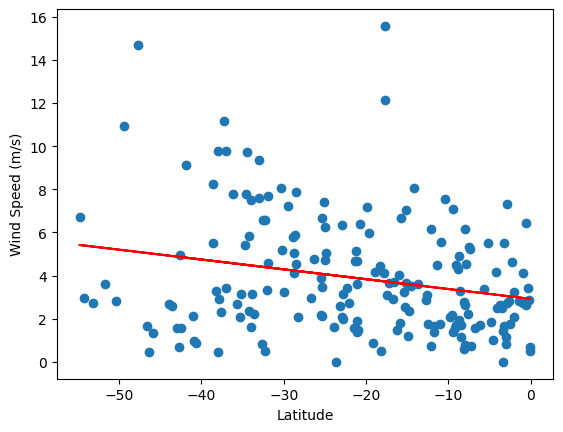

In [106]:
# Southern Hemisphere
df = southern_hemi_df[["Lat", "Wind Speed"]]
lr_plots(df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE